# 03. Functions
To make Python code more readable and reusable, we can factor it out into blocks of code, known as ***functions***. 

## Function `def`inition
The first line of a function is its definition, marked by the keyword `def`:

    def():
    """
    Docstring.
    """

A *docstring*, in triple quotes, describes what the function does. The body of a function is
indented one level. To call a function, give the name of the function followed
by a set of parentheses.

In [1]:
def greet_user():
    """Display a simple greeting."""
    print("Hello!")

In [2]:
??greet_user

In [3]:
greet_user()

Hello!


In [4]:
print('I\'m a print function')

I'm a print function


In [5]:
# ??print

In [6]:
def square(x):
    """
    Power X.
    """
    return x ** 2

In [7]:
square(4)

16

In [8]:
def square(x: float) -> float:
    """
    Squares the number.

    Arguments:
        x {float} -- a number

    Returns:
        float -- the square of the number
        
    Examples:
        >>> square(3)
        9
        >>> square(2.5)
        6.25
        >>> square(2.9)
        8.41
    """
    return x ** 2

In [8]:
result = square(2.5)
result

6.25

In [9]:
def name_age_hash(name='Povilas', age=25):
    """
    Takes name and age as parameters and returns
    a single integ er value representing their hash
    value
    """
    print(hash((name, age)))

In [10]:
name_age_hash

<function __main__.name_age_hash(name='Povilas', age=25)>

In [11]:
name_age_hash()

7448480547011120432


In [12]:
name_age_hash('Jim', age=28)

5947516209532902948


In [13]:
name_age_hash('Bob', age=71)

1652802795631321468


In [14]:
# Note - hash() is not deterministic
from crypt import crypt

def name_age_hash(name: str, age: int, salt: str = 'Pepper') -> int:
    """
    Takes name and age as parameters and returns
    a single integer value representing their hash
    value.

    Keyword Arguments:
        name {str} -- the name of the person (default: {"Dovydas"})
        age {int} -- the age of the person (default: {29})

    Returns:
        int -- the hash of the person

    Examples:
        >>> name_age_hash('Dovydas', 29)
        'PeOwFsC3mXIiE'
        >>> name_age_hash('Geoffrey', 71)
        'PeZpp17pB2ang'
        >>> name_age_hash('Dovydas', age=30)
        'PeJ0lu1x6sT1o'
        >>> name_age_hash('Dovydas', 29, 'Vinted')
        'Vi5RSKuXo0qfw'
    """
    return crypt(f"{name}{age}", salt=salt)

In [15]:
name_age_hash

<function __main__.name_age_hash(name: str, age: int, salt: str = 'Pepper') -> int>

In [16]:
name_age_hash()

TypeError: name_age_hash() missing 2 required positional arguments: 'name' and 'age'

In [17]:
name_age_hash('Jim', age=28)

'PeV6y0g255SA.'

In [18]:
name_age_hash('Bob', age=71)

'PeyiqHz1nsnuw'

### `Exercise 1 - The Enumerate Clone`
Create a function named `enumerate2` which behaves like `enumerate`.

In [19]:
l = ['Cat', 'Dog', 'Mouse']

In [20]:
??enumerate

In [21]:
enumerate(l)

In [22]:
list(enumerate(l))

[(0, 'Cat'), (1, 'Dog'), (2, 'Mouse')]

In [23]:
from typing import Iterable

def enumerate2(iterable: Iterable) -> Iterable:
    """
    enumerate clone

    Arguments:
        iterable {Iterable} -- any iterable

    Returns:
        Iterable -- a result iterable
        
    Examples:
        >>> list(enumerate2([1, 2, 3]))
        [(0, 1), (1, 2), (2, 3)]
    """
    return zip(range(len(iterable)), iterable)

enumerate2(l)

In [25]:
list(enumerate2(l))

[(0, 'Cat'), (1, 'Dog'), (2, 'Mouse')]

In [26]:
for data in [[1, 2, 3], 'some string', ('hi', 10, {1, 2})]:
    assert list(enumerate(data)) == list(enumerate2(data))

### `Exercise 2 - Generator of a Generator`
Create a function which takes a string as a parameter and returns a list and a generator inside another list, e.g.:

Input string:

    'Hi'

    [['H', 'i'], <generator object at ...>]

In [27]:
def string_to_list_and_generator(s):
    return [list(s), (x for x in s)]

string_to_list_and_generator('Hi')

[['H', 'i'],
 <generator object string_to_list_and_generator.<locals>.<genexpr> at 0x7f4d581d3750>]

## Function Defaults

In [28]:
from typing import List

def dangerous_defaults(n: int, data:list=[]) -> List[float]:
    for i in range(n):
        data.append(i)
    return data

In [29]:
dangerous_defaults(5)

[0, 1, 2, 3, 4]

In [30]:
dangerous_defaults(5)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [31]:
dangerous_defaults(5), dangerous_defaults(5)

([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

### `Exercise 3 - Fixing Dangerous Defaults`
Fix the function above to avoid the described error.

In [32]:
from typing import List, Union

def dangerous_defaults(n: int, data:list=None) -> List[float]:
    if data is None:
        data = []
    for i in range(n):
        data.append(i)
    return data
dangerous_defaults(5)

[0, 1, 2, 3, 4]

## Multi Output Functions
In Python, it is possible to return multiple outputs using a single function. 

**JK**, all functions have just a single output (but it may consist of multiple variables | values)

In [33]:
number = 5
def multi_output_fun(number):
    
    return number/2, number**12, number*5

multi_output_fun(number)

(2.5, 244140625, 25)

In [34]:
def multi_output_fun(data):
    keys, values = zip(*data)
    return keys, values

In [35]:
multi_output_fun([('name', 'Jon'), ('house', 'Snow'), ('wolf', 'Ghost')])

(('name', 'house', 'wolf'), ('Jon', 'Snow', 'Ghost'))

### `Exercise 4 - Multi Average Fun(ction)`
Create a `moving_averages` function which takes a list of integers `list_of_ints` as input and returns 3 different moving averages for the input list elements. 
- Average  3 = mean(`i-1`, `i-1`, `i`) for each `i`.
- Average  7 = .....................................
- Average 15 = .....................................

`Hint` It may be helpful to firstly define a function that takes an integer list as input and returns a single moving average, and later call it three times using a more general parent function. E.g:

Input: 

    [41, 30, 25, 68] - List of integers 
    N = 3            - Window size for calculating the averages
    
Output:

    List of integers (the moving average for each of the list entries)

In [60]:
def moving_average(list_of_integers, N):
    
    result=[]
    for idx, number in enumerate(list_of_integers):
        
        numbers = list_of_integers[:idx+1]
        moving_numbers = numbers[-N:]
        moving_mean = round(sum(moving_numbers)/(len(moving_numbers)), 4)
        result.append(moving_mean)
    
    return result

In [61]:
l = [10, 15, 30, 40]
l

[10, 15, 30, 40]

In [62]:
moving_average(l, 3)

[10.0, 12.5, 18.3333, 28.3333]

In [63]:
moving_average(l, 7)

[10.0, 12.5, 18.3333, 23.75]

In [64]:
moving_average(l, 15)

[10.0, 12.5, 18.3333, 23.75]

In [65]:
def multi_moving_averages(list_of_integers):
    
    moving_7 = moving_average(l, 7)
    moving_30 = moving_average(l, 30)
    moving_60 = moving_average(l, 60)
    return moving_3, moving_7, moving_15

multi_moving_averages(l)

([10.0, 12.5, 18.3333, 28.3333],
 [10.0, 12.5, 18.3333, 23.75],
 [10.0, 12.5, 18.3333, 23.75])

## Built-in functions
Some of the built-ins that I found to be the most useful (for the full list, check [this link](https://docs.python.org/3/library/functions.html)):

In [66]:
# print
print(123)

123


In [67]:
# list
list('123'), list({1, 2, 3}), list({1: 'a', 2: 'b', 3: 'c'})

(['1', '2', '3'], [1, 2, 3], [1, 2, 3])

In [68]:
# range
list(map(list, (range(4), range(-10, 2), range(20, 10, -3))))

[[0, 1, 2, 3],
 [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1],
 [20, 17, 14, 11]]

In [69]:
# zip
zip()

In [70]:
# abs
abs(-100), abs(100), abs(10.5), abs(-0.5)

(100, 100, 10.5, 0.5)

In [71]:
# bool
bool(1), bool('123'), bool(''), bool(False), bool([]), bool({'key': 'value'})

(True, True, False, False, False, True)

In [72]:
# all 
# False values: 0, False, None, '', [], set(), {}, ()
all([-1, -2, -3])

True

In [73]:
# all
all([10, '1', True]), all([10, '1', True, False])

(True, False)

In [74]:
# any
any([10, '1', True]), any([10, '0', True, 1]), any([0, '', False, {}])

(True, True, False)

In [75]:
# any
any([0, False, None, '', [], set(), {}, ()]), any([0, False, None, '', [], set(), {}, (), 1])

(False, True)

In [76]:
# chr
chr(97), chr(122), chr(65), chr(90)

('a', 'z', 'A', 'Z')

In [77]:
ord('a'), ord('z'), ord('A'), ord('Z')

(97, 122, 65, 90)

In [78]:
# dict
dict([(0, 'a'), (1, 'b'), (2, 'c')])

{0: 'a', 1: 'b', 2: 'c'}

In [79]:
# dir
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [80]:
# enumerate
enumerate('abcd'), list(enumerate('abc'))

(<enumerate at 0x7f4d5820b2d0>, [(0, 'a'), (1, 'b'), (2, 'c')])

In [81]:
# filter
list(filter(lambda x: x > 2, [1, 2, 3, 4, 5]))

[3, 4, 5]

In [82]:
# float
float('11'), float(99)

(11.0, 99.0)

In [83]:
# help
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [84]:
# input
secret_key = input('What is the secret key?')

What is the secret key?


In [85]:
# int
int('100'), int(10.5), int(True)

(100, 10, 1)

In [86]:
# iter & next
iterator1 = iter([1, 2, 3])
next(iterator1), next(iterator1), next(iterator1)

(1, 2, 3)

In [87]:
# len
len('A man a plan, Panama'), len([6, 6, 6]), len(set([6, 6, 6]))

(20, 3, 1)

In [88]:
# map
list(map(int, list('123')))

[1, 2, 3]

In [89]:
# max & min
max([0, 1, 2, 3, 9, -100]), min([0, 1, 2, 3, 9, -100])

(9, -100)

In [90]:
# reversed
list(reversed('dcba'))

['a', 'b', 'c', 'd']

In [91]:
# set
set([1, 2, 1, 2, 3, 5, 5])

{1, 2, 3, 5}

In [92]:
# sorted
sorted([1, 9, 8, 7])

[1, 7, 8, 9]

In [93]:
# str
str(123), str([1, 2, 3])

('123', '[1, 2, 3]')

In [94]:
# sum
sum([100, 10, 1])

111

In [95]:
# tuple
tuple([1, 2, 3])

(1, 2, 3)

In [96]:
# type
type(1), type('1'), type(True)

(int, str, bool)

### `Exercise 5 - Modularize`
Rewrite all of your developed scripts from `Exercises` in `02_Control_Flow_and_Comprehensions.ipynb` as Python functions to create your first Python **module**. Essentially, a module is a `.py` file, containing a bunch of Python definitions and statements that you can access using the `import` statement. E.g., `import utils.py` imports all of the definitions to the current session and they can be accessed using their respective names.

### `Exercise 6 - Fibonacci`
Write a Python function to get the Fibonacci series up to some certain number (n). 

**N.B.** The Fibonacci Sequence is a series of numbers, where every following number is defined by the sum of the two previous numbers: 

    0, 1, 1, 2, 3, 5....
    
Input:

    fibonacci(10)
    
Output:
    
    [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [ ]:
def fibonacci(n):
    result = []
    a, b = 0, 1
    while len(result) < n:
        (a, b) = [b, a + b]
        result.append(a)
    return result

fibonacci(10)

### `Exercise 7 - Upper/Lower`
Write a Python function that accepts a string and calculates the number of upper case letters and lower case letters it has. E.g.:

    Input   :  The quick Brown Fox
    N Upper :  3
    N Lower :  13


In [24]:
def string_test(s):
    d={
        "UPPER_CASE":0,  
        "LOWER_CASE":0
    }
    for c in s:
        if c.isupper():
            d["UPPER_CASE"]+=1
        elif c.islower():
            d["LOWER_CASE"]+=1
        else:
            pass
    print ("Input   : ", s)
    print ("N Upper : ", d["UPPER_CASE"])
    print ("N Lower : ", d["LOWER_CASE"])

string_test('The quick Brown Fox')

Input   :  The quick Brown Fox
N Upper :  3
N Lower :  13


### `Exercise 8 - The Mover`
Write a Python function that returns no output bus moves files from one directory to another. Bring a dummy folder with some files to the present working directory to play around (nothing important, for your own good:)).
    
Inputs:

    input_path (string)       - the directory containing the files that have to be movied/copied.
    output_path (string)      - the directory to which the files have to be moved.
    copy (boolean)            - if `True` (default), keep the original directory intact (otherwise delete it).
    
Check Python built-in libraries `glob`, `os`, and `shutil` to complete the task:

**N.B.** Don't forget that you will have to create the output path before moving the files, possibly recursively if you directory is nested.

In [25]:
import os
from glob import glob
import shutil

In [27]:
pwd = os.getcwd()
pwd

'/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course'

In [28]:
os.listdir()

['.ipynb_checkpoints',
 'README.md',
 '04_Generators_and_More_Functions.ipynb',
 'data',
 '03_Functions.ipynb',
 '02_Control_Flow_and_Comprehensions.ipynb',
 '01_Introduction_to_Python_and_Jupyter.ipynb']

In [29]:
os.listdir(pwd)

['.ipynb_checkpoints',
 'README.md',
 '04_Generators_and_More_Functions.ipynb',
 'data',
 '03_Functions.ipynb',
 '02_Control_Flow_and_Comprehensions.ipynb',
 '01_Introduction_to_Python_and_Jupyter.ipynb']

In [30]:
glob(f'{pwd}/data/*/*')

['/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Clinton',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump_copy']

In [13]:
# Let's say we want to duplicate the Trump corpus files
chosen_dir = f'{pwd}/data/clinton_trump_corpus/Trump'
target_dir = f'{pwd}/data/clinton_trump_corpus/Trump_copy'

# These seem to be all the files that will have to be moved
glob(f'{chosen_dir}/*')

['/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-09-12-A.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-09-01-A.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-07-25.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-10-06.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-07-22.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-08-05.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-08-12-B.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-10-18.txt',
 '/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-10-10-B

In [15]:
def mover(inp_path, out_path, copy=True):
    
    if not os.path.exists(inp_path):
        print (f'The path `{inp_path}` does not exist! Please provide a valid input path.')
        return
    
    if not os.path.exists(out_path):
        print (f'The path `{out_path}` does not exist! Creating...')
        os.mkdir(out_path)
    
    fns = glob(f'{inp_path}/*')
    for fn in fns:
        new_fn = out_path + '/' + fn.split('/')[-1]
        
        print (fn.split('/'))
        
        print (fn, new_fn)
        shutil.copy(fn, new_fn)
        
        if not copy:
            os.remove(fn)
        
mover(chosen_dir, target_dir)

/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-09-12-A.txt /home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump_copy/Trump_2016-09-12-A.txt
/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-09-01-A.txt /home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump_copy/Trump_2016-09-01-A.txt
/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-07-25.txt /home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump_copy/Trump_2016-07-25.txt
/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-10-06.txt /home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump_copy/Trump_2016-10-06.txt
/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-07-22.txt /home/ond

### `Exercise 9 - Reader`
Write a Python function `def reader(....)` that reads the contents of a of `.txt` file (use one of the speeches within the `data/clinton_trump_corpus`.
   
Input:

    input_path (string)       - the path to the `.txt` file that will be read.
    
Output

    lines                     - a list of lines (strings) from the `.txt` file.

In [16]:
def reader(in_fn):
    
    with open(in_fn, 'r') as inputfile:
        lines = inputfile.readlines()
    return lines

def reader(in_fn):
    
    with open(in_fn, 'r') as inputfile:
        lines = inputfile.readlines()
    return lines

reader(f'{chosen_dir}/Trump_2016-09-12-A.txt')

['<title="Donald Trump, Republican Presidential Candidate, delivers remarks at a campaign event in Asheville, North Carolina (SD/24)">\n',
 '<date:"2016-09-12">\n',
 "<UNKNOWN: Thank you. What a great crowd. Wow. People in Asheville really know how to crowd in a place with tremendous enthusiasm, great spirit because you're here to elect Donald Trump, president of the United States, right? You want a change in direction, don't you? (APPLAUSE)>\n",
 '<UNKNOWN: Well, so does 7 percent of the American people, 70 percent of our fellow Americans agree with us, they want to change direction. Does anybody think that Hillary Clinton is changing direction? (AUDIENCE BOOS)>\n',
 "<UNKNOWN: Who's going to change direction? Donald Trump. That's absolutely right. While Donald Trump has been running for the last four or five weeks of campaign in which he's laying out issue after issue and what he's going to do about it, Hillary Clinton has been running a campaign of hatred and anger and meanness and 

### `Exercise 10 - Multi-Reader`
Write a Python function `def multi_reader(...)` that uses **The Reader** in order to get the contents of all text `.txt` files within a directory.
   
Input:

    input_path (string)       - the path to the directory containing a bunch of .txt files. 
        
Output

    documents                 - a list of line-lists (for each of the corresponding .txt files).

In [19]:
def multi_reader(folder_path):
    
    result=[]
    for fn in glob(chosen_dir+'/*'):
        print (fn)
        lines = reader(fn)
        print (lines)
        print (len(lines))
        result.append(lines)
    print (len(result))
    print (len(glob(chosen_dir+'/*')))
    return result

multi_reader(chosen_dir)

/home/ondes/Desktop/CA_AI_2020/01_Python_Crash_Course/data/clinton_trump_corpus/Trump/Trump_2016-09-12-A.txt
['<title="Donald Trump, Republican Presidential Candidate, delivers remarks at a campaign event in Asheville, North Carolina (SD/24)">\n', '<date:"2016-09-12">\n', "<UNKNOWN: Thank you. What a great crowd. Wow. People in Asheville really know how to crowd in a place with tremendous enthusiasm, great spirit because you're here to elect Donald Trump, president of the United States, right? You want a change in direction, don't you? (APPLAUSE)>\n", '<UNKNOWN: Well, so does 7 percent of the American people, 70 percent of our fellow Americans agree with us, they want to change direction. Does anybody think that Hillary Clinton is changing direction? (AUDIENCE BOOS)>\n', "<UNKNOWN: Who's going to change direction? Donald Trump. That's absolutely right. While Donald Trump has been running for the last four or five weeks of campaign in which he's laying out issue after issue and what he'

In [22]:
def multi_reader(folder_path):
    
    result=[]
    for fn in glob(chosen_dir+'/*'):
        #print (fn)
        lines = reader(fn)
        #print (lines)
        #print (len(lines))
        result.append(lines)
    #print (len(result))
    #print (len(glob(chosen_dir+'/*')))
    return result

### `Exercise 11 - Stats-Reader`
Write a Python function `def stats_reader(...)` that uses **Multi Reader** to get the contents of multiple text files (e.g., a corpus of documents for a single person), and returns a variety of stats about them:

Input:

    documents         - a list of line-lists (for each of the corresponding .txt files).
    
Output

    word_count        - total amount of words in all of the documents.
    vocab_size        - total amount of unique words in all of the documebts.
    mean_word_count   - average amount of words per document.
    n_lines           - average amount of lines per document.
    top_words         - top 50 most common words.

In [24]:
def flatten(input_list): return [item for inner_list in input_list for item in inner_list]

In [26]:
def stats_reader(target_dir):
    list_of_documents = multi_reader(target_dir)
    
    # Flatten the list of documents 2 times:
    # 1. Get the list of lines
    line_list = flatten(list_of_documents)
    
    # 2. Get the list of words
    word_list = flatten(line_list)
    
    # Get word count stats
    word_count = len(word_list)
    vocab_count = len(set(word_list))
    
    # Get line stats
    n_lines = len(line_list)
    
    ##### YOUR CODE GOES HERE   
    
    
    return word_count, vocab_count, n_lines

stats_reader(chosen_dir)

(2611374, 87, 2450)

Now use the stats reader to compare the presidential Donald Trumph's and Hilary Clinton's speeches, think about answering these questions:

    What did you observe?
    What could this mean?
    Are there any technical flaws? What could be done better?
    What further analysis might be useful in providing more information about the candidates?

Discuss these questions in groups, compare your `stats_reader` implementations, and outline a plan for improving your analysis, including any code changes that may be necessary (think simple this time, let's stick to basic Python, not some fancy NLP libraries).

Collect your notes in one place, e.g.: HERE

Actually improve the design of the `stats_reader` and review the new results. Share your thought process and findings with your colleagues.

In [ ]:
# YOUR CODE GOES HERE

## Extended Iterable Unpacking
### The Star `*` Operator
    The `*` operator in Python let's you to contain an arbitrary number of arguments within one paremeter.

In [31]:
glob('')

[]

In [32]:
ai_list = list('AI')
ai_list

['A', 'I']

In [33]:
first_letter, second_letter = ai_list
first_letter, second_letter

('A', 'I')

In [34]:
first_letter = ai_list[0]
second_letter = ai_list[1]
first_letter, second_letter

('A', 'I')

In [35]:
ai_word_list = ['Anyone', 'can', 'learn', 'AI']

In [36]:
first_word, *other_words = ai_word_list
first_word, other_words

('Anyone', ['can', 'learn', 'AI'])

In [37]:
first_word, *middle_words, last_word = ai_word_list
first_word, middle_words, last_word

('Anyone', ['can', 'learn'], 'AI')

## Function arguments - the `*` operator
- Python let's you to contain an arbitrary number of arguments within one paremeter using the `*` operator
- The `**` operator allows a parameter to collect an arbitrary number of keyword arguments
- A parameter that accepts an arbitrary number of arguments must come last in the function definition

In [38]:
sum(1, 2, 3)

TypeError: sum expected at most 2 arguments, got 3

In [39]:
??sum

From the docstring: `sum(iterable, start=0, /)`

    `sum` takes just two arguments - an iterable and a starting point.

In [40]:
sum([1,2,3], 0)

6

In [46]:
sum((1,2,3), 5)

11

Let's make a `sum2` function, which takes as many parameters as needed:

In [47]:
def sum2(*args):
    #print (args)
    return sum(args)

In [48]:
sum2(1, 2, 3, 4)

10

The problem now is that we can't add a starting point as a param anymore. Let's fix it:

In [49]:
def sum2(*args, start=0):
    return sum(args, start)

In [50]:
sum2(1, 2, 3, 4, start=100)

110

***Collecting an arbitrary number of arguments:***

In [51]:
def make_pizza(size, *toppings):
    """Make a pizza."""
    print("\nMaking a " + size + " pizza.")
    print("Toppings:")
    for topping in toppings:
        print("- " + topping)

In [52]:
make_pizza('small', 'pepperoni')


Making a small pizza.
Toppings:
- pepperoni


In [53]:
make_pizza('large', 'bacon bits', 'pineapple')


Making a large pizza.
Toppings:
- bacon bits
- pineapple


In [54]:
make_pizza('medium', 'mushrooms', 'peppers', 'onions', 'extra cheese')


Making a medium pizza.
Toppings:
- mushrooms
- peppers
- onions
- extra cheese


***Collecting an arbitrary number of keyword arguments:***

In [55]:
def build_profile(first, last, **user_info):
    """Build a user's profile dictionary."""
    
    # Build a dict with the required keys.
    profile = {'first': first, 'last': last}
    
    # Add any other keys and values.
    for key, value in user_info.items():
        profile[key] = value
        
    return profile

In [56]:
# Create two users with different kinds of information.
user_0 = build_profile('albert', 'einstein', location='princeton')
user_0

{'first': 'albert', 'last': 'einstein', 'location': 'princeton'}

In [57]:
user_1 = build_profile('marie', 'curie', location='paris', field='chemistry')
user_1

{'first': 'marie', 'last': 'curie', 'location': 'paris', 'field': 'chemistry'}

***Collecting an arbitrary number of arguments | keyword arguments:***

In [58]:
def inner(a=1, b=2, c=3):
    return a + b + c

def outer(fn, *args, **kwargs):
    return fn(*args, **kwargs)

In [59]:
outer(print, 100, 200, 300, sep=' + ')

100 + 200 + 300


In [60]:
outer(print, 100, 200, 300, sep=' + ', end='\t')
outer(print, 100, 200, 300, sep=' + ', end='\t')

100 + 200 + 300	100 + 200 + 300	

In [61]:
def catch_all(*args, **kwargs):
    print(args)
    print(kwargs)
    
catch_all(1, 2, 3, test=True, is_valid=False)

(1, 2, 3)
{'test': True, 'is_valid': False}


In [62]:
catch_all(1, 2, 3, **{'test': True, 'is_valid': False})

(1, 2, 3)
{'test': True, 'is_valid': False}


### `Exercise 12`
Create a `build_student_profile` function that takes as input:
- Students name and surname.
- An arbitrary number of middle names.
- An arbitrary number of arguments representing students phone, address, etc.

The function should return user profile dictionary as given in the example above, but the middle names should be stored together as a single string (separated by whitespaces).

# Recursive Functions
Formally, a recursive function is a function defined in terms of itself via self-referential expressions. That is, such function will repeat its behaviour until some condition is met to return a result.

    A good real world example of recursion could be the mirror effect. If we place another mirror in front of the first one, the objects get reflected recursively. Yes, the movie Inception is another nice example of recursion. Equivalently dizzy.

All functions of such kind share a common structure made up of two parts: the base case and the recursive case. To demonstrate this stucture, let's try creating a recursive function that calculates the factorial `n!` of a number:
    
    
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2 x 1
    
This can be deconstructed into smaller pieces by calling the factorial function itself (recursively): 

    n! = n x (n−1)! 
    n! = n x (n−1) x (n−2)!
    n! = n x (n−1) x (n−2) x (n−3)!
    ...
    ...
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3!
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2!
    n! = n x (n−1) x (n−2) x (n−3) ⋅⋅⋅⋅ x 3 x 2 x 1!
    
Here, `1!` is our base case, and it equals 1. 

In [75]:
def factorial_recursive(n):
    
    # Base case: 1! = 1
    if n == 1:
        return 1

    # Recursive case: n! = n * (n-1)!
    else:
        return n * factorial_recursive(n-1)
    
factorial_recursive(4)

24

When we call this function with a positive integer, it will recursively call itself by decreasing the number:

    factorial_recursive(4)              # 1st call with 4
    4 * factorial_recursive(3)          # 2nd call with 3
    4 * 3 * factorial_recursive(2)      # 3rd call with 2
    4 * 3 * 2 * factorial_recursive(1)  # 4th call with 1
    4 * 3 * 2 * 1                  # return from 4th call as number=1
    4 * 3 * 2                      # return from 3rd call
    4 * 6                          # return from 2nd call
    24                             # return from 1st call

This recursion ends when the number reaches the base condition. If this condition is not met, the function call itself infinitely.

### Maintaining the State
When dealing with recursive functions, it may be hard to keep the track of its progress and debug any potential issues, so you should try to maintain their state:
- ***Thread the state*** through each recursive call so that the current state is a part of the current call's execution context.
- Keep the state in ***global scope*** (global variable instead of an instance one).

Here's an example of the first approach:

In [67]:
def sum_recursive(current_number, accumulated_sum):
    
    # Base case
    # Return the final state
    if current_number == 11:
        return accumulated_sum

    # Recursive case
    # Thread the state through the recursive call
    else:
        return sum_recursive(current_number + 1, accumulated_sum + current_number)

In [68]:
sum_recursive(1, 0)

55

In [ ]:
#print

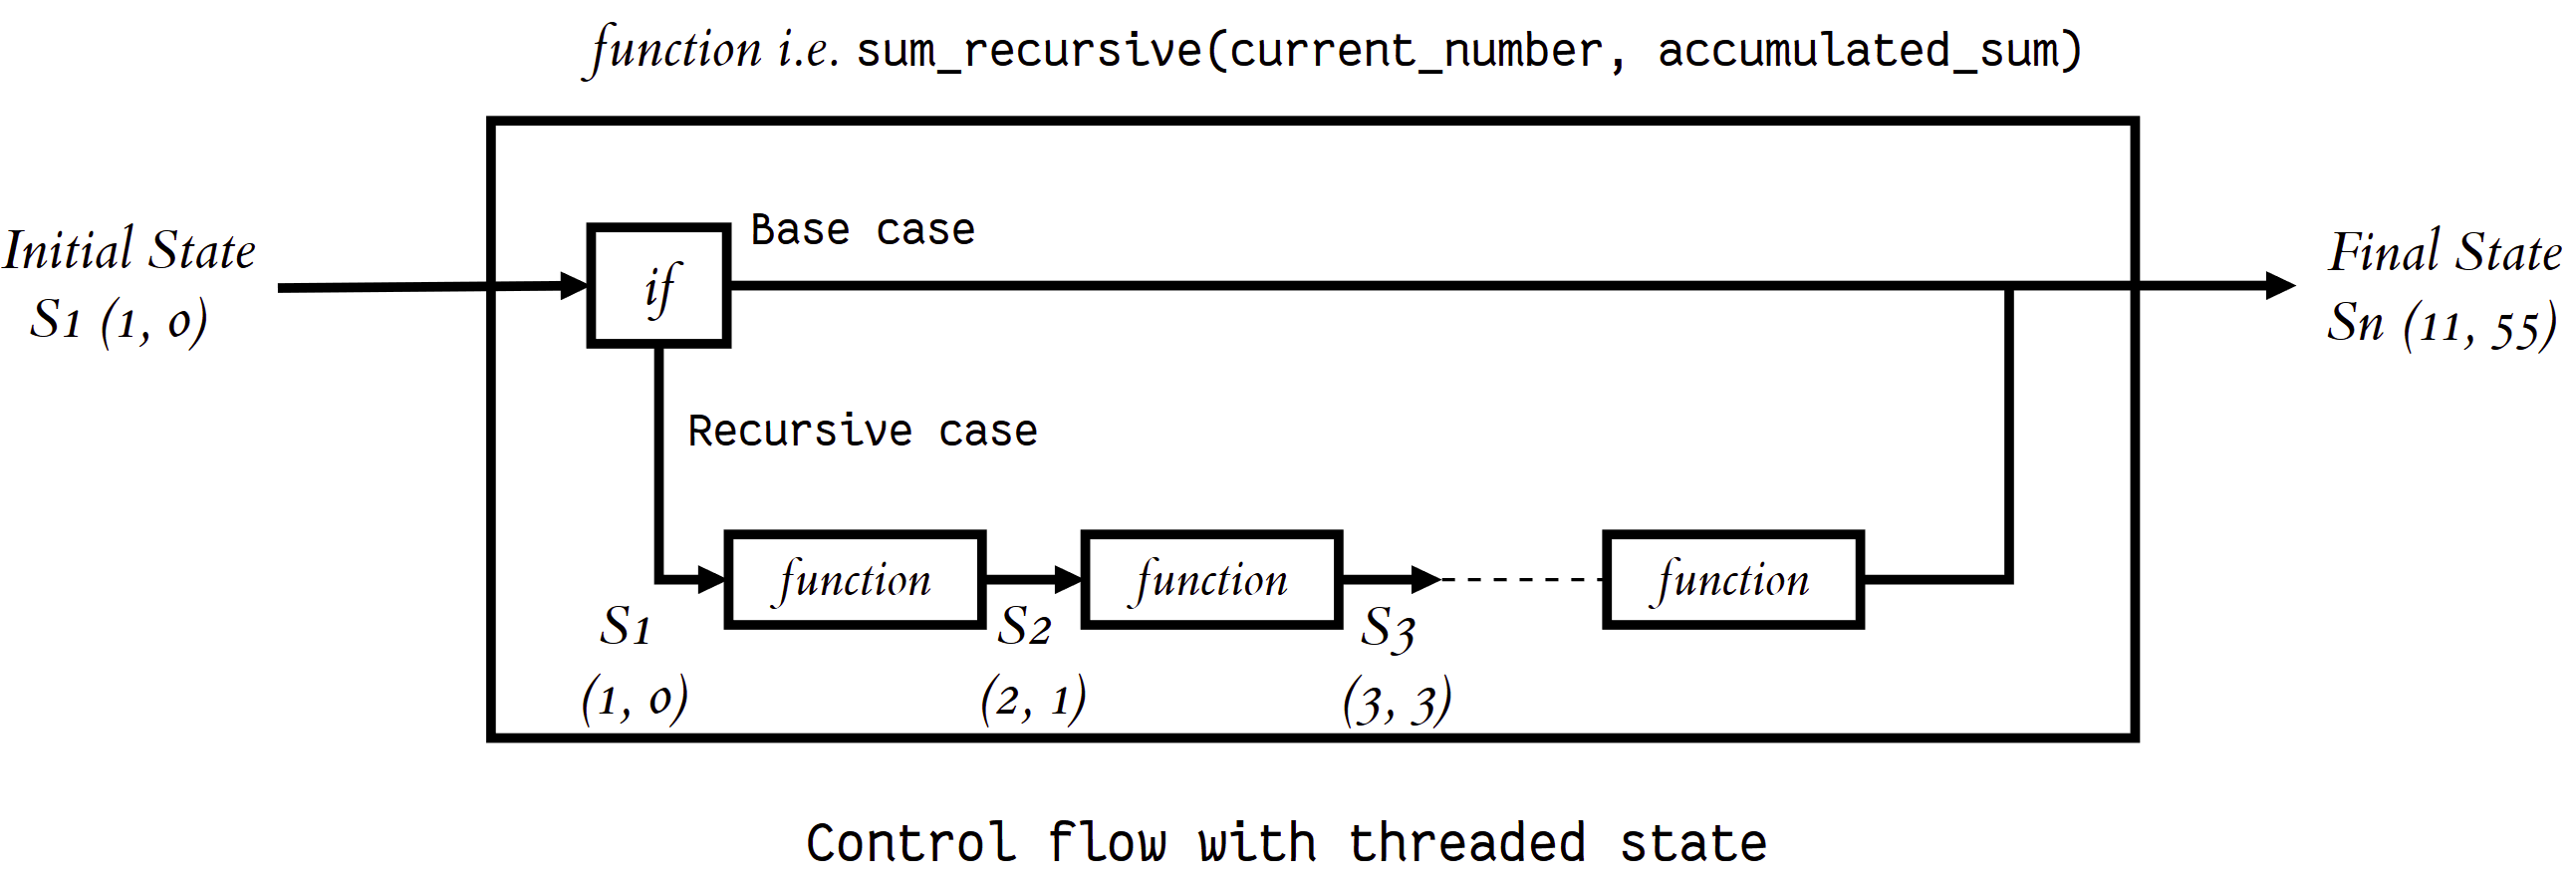

Image adopted from this [link](https://realpython.com/python-thinking-recursively/). You may want to look through it for more information about recursion in Python.

Here's the second example - keeping the states within the ***global scope***:

In [70]:
# Global mutable state
current_number = 1
accumulated_sum = 0

def sum_recursive():
    
    global current_number
    global accumulated_sum
    
    # Base case
    if current_number == 11:
        return accumulated_sum
    
    # Recursive case
    else:
        accumulated_sum = accumulated_sum + current_number
        current_number = current_number + 1
        return sum_recursive()

In [71]:
sum_recursive()

55

However, global variables are considered to be a bad practice in programming (not only Python), so you should avoid this approach whenever possible.

**N.B.** Global constants are not conceptually the same as global variables; global constants are perfectly harmless. In Python, the distinction between the two is purely by convention: CONSTANTS_ARE_CAPITALIZED and globals_are_not.

    The global variables are bad is that they enable functions to have hidden (non-obvious, surprising, hard to detect, hard to diagnose) side effects, leading to an increase in code complexity.

However, sane use of global state is acceptable (as is local state and mutability) even in functional programming, either for algorithm optimization, reduced complexity, caching and memoization, or the practicality of porting structures originating in a predominantly imperative codebase.

For more information about the global variable problems, check these links: [1](http://c2.com/cgi/wiki?GlobalVariablesAreBad) and [2](https://softwareengineering.stackexchange.com/questions/148108/why-is-global-state-so-evil)

### Recursive Fibonacci

Here's an additional example of a recursive function for calculating the Fibonacci numbers:

In [72]:
def fibonacci_recursive(n):
    print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [73]:
fibonacci_recursive(5)

Calculating F(5), Calculating F(4), Calculating F(3), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(1), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(3), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(1), 

5

As you can see from the output above, we are unnecessarily recomputing values. Let’s try to improve fibonacci_recursive by caching the results of each Fibonacci computation:

In [ ]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fibonacci_recursive(n):
    print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)


`lru_cache` is a decorator that caches the results. Thus, we avoid recomputation by explicitly checking for the value before trying to compute it. One thing to keep in mind about `lru_cache` is that since it uses a dictionary to cache results, the positional and keyword arguments (which serve as keys in that dictionary) to the function must be hashable.

### `Exercise 13`
Write a Fibonacci number calculator using recursion.


### Why Recursion?

***Pros***
1. Recursive functions make the code look clean and elegant
2. A complex task can be broken down into simpler sub-problems using recursion.
2. Sequence generation is easier with recursion than using some nested iteration

***Cons***
1. Sometimes the logic behind recursion is hard to follow through.
2. Recursive calls are expensive (inefficient) as they take up a lot of memory and time.
3. Recursive functions are hard to debug.

## What is the best way to structure a function?
As you have observed previously, there are multiple ways to write and call a function. When you are starting out, try to simply ***make it work, later polish it to be reliable and efficient***. After you develop an understanding of the more subtle advantages of the different structures | syntax, just ***explore and time it***.

## Autotiming with Jupyter
For automatic timing on Jupyter Notebook cells, go to your anaconda prompt, activate the working environment, and run (in terminal): 

    pip install ipython-autotime
    
Then add this line at the top of the notebook near the imports and run the cell:
    
    %load_ext autotime